<a href="https://colab.research.google.com/github/SibeleTatiana/WebAggregat/blob/main/Deep_Learning_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
entradas = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
saidas = np.array( [0, 0, 0, 1] )
pesos = np.array( [0.0, 0.0] )
taxaAprendizagem = 0.1

def funcao_ativacao(soma):
  if soma>=1:
    return 1
  else:
    return 0

def calcula_saida(entrada):
  s = entrada.dot(pesos)
  return funcao_ativacao(s)

def treinar():
  erroTotal = 1

  while erroTotal != 0:
    erroTotal = 0
    for i in range(len(saidas)):
      saidaCalculada = calcula_saida( entradas[i] )
      erro = saidas[i] - saidaCalculada
      erroTotal += erro
#      print(f"\tDado: {i}")
      for j in range(len(pesos)):
        pesos[j] = pesos[j] + (taxaAprendizagem * entradas[i][j] * erro)
#        print(f"\t\tPeso atualizado {j}: {pesos[j]}")
#        print(f"---> Total de erros: {erroTotal}\n")

treinar()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame( iris.data, columns=iris.feature_names )
data["class"] = iris.target
data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
data['class'].describe()

,class
count,150.000000
mean,1.000000
std,0.819232
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [ ]:
X = data.drop(columns=["class"])
y = data["class"]

X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.2,
  random_state=42
)

p = Perceptron(random_state=42)
p.fit(X_train, y_train)
p.coef_ # pesos

array([[  3. ,   7.9, -12.5,  -5.2],
       [ 15.9, -33.3,   6.1, -24.9],
       [-27.6, -24.9,  27.8,  27.4]])

In [ ]:
p.intercept_ # ajuste

array([  2.,  14., -13.])

In [ ]:
y_pred = p.predict(X_test)
accuracy_score(y_pred, y_test).round(2)

0.63

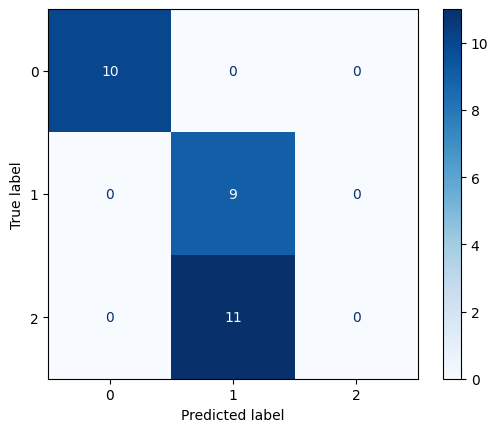

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def mc(teste_labels, teste_preds, labels):
  cm = confusion_matrix(teste_labels, teste_preds, labels=labels)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
  disp.plot(cmap="Blues")

mc(y_test, y_pred, p.classes_)